In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2


from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16
from tqdm import tqdm
import pandas as pd

In [ ]:
from skimage import io, filters, feature,  restoration, exposure, morphology
from skimage.color import rgb2gray
from skimage.filters import frangi,unsharp_mask

In [ ]:
def show_img(path, resize = None):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #gray scale
  img = cv2.equalizeHist(img) #histogram equalization
  sharpen = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]]) #sharpening image
  img = cv2.filter2D(img,-1,sharpen)
  selem = morphology.square(3)
  img = filters.median(img, selem=selem)
  if resize != None:
    img = cv2.resize(img, resize, interpolation = cv2.INTER_AREA) 
  return img

def over_sampling(class0, class1, class2, class3, class4, class5, class6):
  
  len0 = len(os.listdir(class0))
  len1 = len(os.listdir(class1))
  len2 = len(os.listdir(class2))
  len3 = len(os.listdir(class3))
  len4 = len(os.listdir(class4))
  len5 = len(os.listdir(class5))
  len6 = len(os.listdir(class6)) 

  res_df = pd.DataFrame()

  df_class0 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class0):
      img_path = os.path.join(class0, i)
      df_class0["images"].append(show_img(img_path, (224, 224)))
      df_class0["label"].append(0)
  df_class0 = pd.DataFrame(df_class0)

  df_class1 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class1):
      img_path = os.path.join(class1, i)
      df_class1["images"].append(show_img(img_path, (224, 224)))
      df_class1["label"].append(1)
  df_class1 = pd.DataFrame(df_class1)
  df_class1 = df_class1.sample(400, replace = True, random_state = 42)

  df_class2 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class2):
      img_path = os.path.join(class2, i)
      df_class2["images"].append(show_img(img_path, (224, 224)))
      df_class2["label"].append(2)
  df_class2 = pd.DataFrame(df_class2)

  df_class3 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class3):
      img_path = os.path.join(class3, i)
      df_class3["images"].append(show_img(img_path, (224, 224)))
      df_class3["label"].append(3)
  df_class3 = pd.DataFrame(df_class3)

  df_class4 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class4):
      img_path = os.path.join(class4, i)
      df_class4["images"].append(show_img(img_path, (224, 224)))
      df_class4["label"].append(4)
  df_class4 = pd.DataFrame(df_class4)


  df_class5 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class5):
      img_path = os.path.join(class5, i)
      df_class5["images"].append(show_img(img_path, (224, 224)))
      df_class5["label"].append(5)
  df_class5 = pd.DataFrame(df_class5)

  df_class6 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class6):
      img_path = os.path.join(class6, i)
      df_class6["images"].append(show_img(img_path, (224, 224)))
      df_class6["label"].append(6)
  df_class6 = pd.DataFrame(df_class6)
  df_class6 = df_class6.sample(400, replace = True, random_state = 42)

  print("EA: ", df_class0.count())
  print("EH_Complex: ", df_class1.count())
  print("EH_Simple: ", df_class2.count())
  print("EP: ", df_class3.count())
  print("NE_Follicular: ", df_class4.count())
  print("NE_Luteal: ", df_class5.count())
  print("NE_Menstrual: ", df_class6.count())
  
  res_df = pd.concat([df_class0, df_class1, df_class2, df_class3, df_class4, df_class5, df_class6], axis = 0)
  return (np.array(list(res_df["images"])), np.array(res_df["label"]))

over_x, over_y = over_sampling("/content/drive/MyDrive/Tarp/Dataset/EA", "/content/drive/MyDrive/Tarp/Dataset/EH_Complex", "/content/drive/MyDrive/Tarp/Dataset/EH_Simple",
                               "/content/drive/MyDrive/Tarp/Dataset/EP", "/content/drive/MyDrive/Tarp/Dataset/NE_Follicular", "/content/drive/MyDrive/Tarp/Dataset/NE_Luteal", 
                               "/content/drive/MyDrive/Tarp/Dataset/NE_Menstrual")

EA:  images    400
label     400
dtype: int64
EH_Complex:  images    400
label     400
dtype: int64
EH_Simple:  images    400
label     400
dtype: int64
EP:  images    400
label     400
dtype: int64
NE_Follicular:  images    400
label     400
dtype: int64
NE_Luteal:  images    400
label     400
dtype: int64
NE_Menstrual:  images    400
label     400
dtype: int64


In [ ]:
over_x.shape

(2800, 224, 224)

In [ ]:
equalized_imgs_x = np.repeat(over_x[..., np.newaxis], 3, -1)
equalized_imgs_x.shape

(2800, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    equalized_imgs_x, over_y, test_size=0.33, random_state=42, stratify = over_y)

In [ ]:
x_train.shape

(1876, 224, 224, 3)

In [ ]:
x_test.shape

(924, 224, 224, 3)

In [ ]:
y_train.shape, sum(y_train == 0), sum(y_train == 1)

((1876,), 268, 268)

In [ ]:
y_test.shape, sum(y_test == 0), sum(y_test == 1)

((924,), 132, 132)

In [ ]:
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation, RandomContrast
import tensorflow as tf

In [ ]:
data_augmentation = Sequential([
  RandomFlip('horizontal_and_vertical'),
  RandomRotation(10),
  RandomTranslation(width_factor=0.2, height_factor=0.2),
  RandomContrast(factor=0.2)
])

preprocess_input = tf.keras.applications.resnet50.preprocess_input

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



def model_result(funcs, aug = False):

  res_df = pd.DataFrame()
  res_df["Convolution Model"] = pd.Series([])
  res_df["Accuracy"] = pd.Series([])
  res_df["True Negatives"] = pd.Series([])
  res_df["False Negatives"] = pd.Series([])
  res_df["True Positives"] = pd.Series([])
  res_df["False Positives"] = pd.Series([])

  for i in funcs:
    base_model = i
    #Load model without classifier/fully connected layers
    inp_model = base_model(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet',
    )
    #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
    for layer in inp_model.layers:
      layer.trainable = False
    
    if aug == True:
      inputs = Input(shape=(224, 224, 3))
      x = data_augmentation(inputs)
      # x = preprocess_input(inputs)
      outputs = inp_model(x)
      inp_model = tf.keras.Model(inputs, outputs)
    # inp_model.summary()  #Trainable parameters will be 0

    #Now, let us use features from convolutional network for RF
    feature_extractor = inp_model.predict(x_train)

    features = feature_extractor.reshape(feature_extractor.shape[0], -1)

    X_for_RF = features #This is our X input to RF

    

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    # rf = RandomForestRegressor()
    #RANDOM FOREST
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    # RF_model_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

    # Fit the random search model
    # RF_model_search.fit(X_for_RF, y_train)
    # RF_model = RF_model_search.best_estimator_

    RF_model = rf
    # # Train the model on training data
    RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

    #Send test data through same feature extractor process
    X_test_feature = inp_model.predict(x_test)
    X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

    #Now predict using the trained RF model. 
    prediction_RF = RF_model.predict(X_test_features)

    #Print overall accuracy
    from sklearn import metrics
    acc = metrics.accuracy_score(y_test, prediction_RF)
    print ("Accuracy = ", acc)

    #Confusion Matrix - verify accuracy of each class
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test, prediction_RF)
    #print(cm)
    # sns.heatmap(cm, annot=True)
    res_df.loc[len(res_df)] = [str(i), acc, cm[0][0], cm[1][0], cm[1][1], cm[0][1]]
    print(res_df.loc[len(res_df) - 1])
    #Check results on a few select images
    n=np.random.randint(0, x_test.shape[0])
    img = x_test[n]
    plt.imshow(img)
    input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
    input_img_feature= inp_model.predict(input_img)
    input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
    prediction_RF = RF_model.predict(input_img_features)[0]
    print("The prediction for this image is: ", prediction_RF)
    print("The actual label for this image is: ", y_test[n])
  
  return res_df

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from tensorflow.keras.applications.nasnet import NASNetMobile, NASNetLarge
from tensorflow.keras.applications.resnet import ResNet101, ResNet152
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, ResNet101V2, ResNet152V2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

In [ ]:
cnn_models = [ResNet50, ResNet101, ResNet152, ResNet50V2, ResNet101V2, ResNet152V2, Xception, VGG16, VGG19, InceptionV3, InceptionResNetV2, DenseNet201, DenseNet121, DenseNet169]
# cnn_models = [ResNet101]

<ipython-input-14-8467c9a582b2>:36: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["Convolution Model"] = pd.Series([])
<ipython-input-14-8467c9a582b2>:37: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["Accuracy"] = pd.Series([])
<ipython-input-14-8467c9a582b2>:38: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["True Negatives"] = pd.Series([])
<ipython-input-14-8467c9a582b2>:39: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["False Negatives"] = pd.Series([])
<ipython-input-14-8467

29/29 [==============================] - 3s 109ms/step
Accuracy =  0.6363636363636364
Convolution Model    <function ResNet50 at 0x7f23fd1fd4c0>
Accuracy                                          0.636364
True Negatives                                       103.0
False Negatives                                       24.0
True Positives                                        94.0
False Positives                                        3.0
Name: 0, dtype: object
1/1 [==============================] - 0s 338ms/step
The prediction for this image is:  1
The actual label for this image is:  1
29/29 [==============================] - 4s 149ms/step
Accuracy =  0.6504329004329005
Convolution Model    <function ResNet101 at 0x7f23fd1fd550>
Accuracy                                           0.650433
True Negatives                                        105.0
False Negatives                                        25.0
True Positives                                         92.0
False Positives       

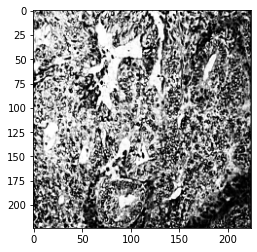

In [ ]:
cnn_models_train = model_result(cnn_models)

Random Forest

RandomForestClassifier(n_estimators = 100, random_state = 42)

In [ ]:
print(cnn_models_train)

                                 Convolution Model  Accuracy  True Negatives  \
0            <function ResNet50 at 0x7f23fd1fd4c0>  0.636364           103.0   
1           <function ResNet101 at 0x7f23fd1fd550>  0.650433           105.0   
2           <function ResNet152 at 0x7f23fd1fd5e0>  0.627706           105.0   
3          <function ResNet50V2 at 0x7f23fd20a4c0>  0.520563            60.0   
4         <function ResNet101V2 at 0x7f23fd20a5e0>  0.529221            58.0   
5         <function ResNet152V2 at 0x7f23fd20a670>  0.559524            67.0   
6            <function Xception at 0x7f23fd20adc0>  0.544372            52.0   
7               <function VGG16 at 0x7f23fd20a820>  0.615801           108.0   
8               <function VGG19 at 0x7f23fd20aaf0>  0.630952           115.0   
9         <function InceptionV3 at 0x7f23fd25af70>  0.506494            52.0   
10  <function InceptionResNetV2 at 0x7f23fd25ac10>  0.493506            61.0   
11        <function DenseNet201 at 0x7f2

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



def model_result(funcs, aug = False):

  res_df = pd.DataFrame()
  res_df["Convolution Model"] = pd.Series([])
  res_df["Accuracy"] = pd.Series([])
  res_df["True Negatives"] = pd.Series([])
  res_df["False Negatives"] = pd.Series([])
  res_df["True Positives"] = pd.Series([])
  res_df["False Positives"] = pd.Series([])

  for i in funcs:
    base_model = i
    #Load model without classifier/fully connected layers
    inp_model = base_model(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet',
    )
    #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
    for layer in inp_model.layers:
      layer.trainable = False
    
    if aug == True:
      inputs = Input(shape=(224, 224, 3))
      x = data_augmentation(inputs)
      # x = preprocess_input(inputs)
      outputs = inp_model(x)
      inp_model = tf.keras.Model(inputs, outputs)
    # inp_model.summary()  #Trainable parameters will be 0

    #Now, let us use features from convolutional network for RF
    feature_extractor = inp_model.predict(x_train)

    features = feature_extractor.reshape(feature_extractor.shape[0], -1)

    X_for_RF = features #This is our X input to RF

    

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    # rf = RandomForestRegressor()
    #RANDOM FOREST
    from sklearn import svm
    rf=svm.SVC(decision_function_shape='ovo',kernel='linear')

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    # RF_model_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

    # Fit the random search model
    # RF_model_search.fit(X_for_RF, y_train)
    # RF_model = RF_model_search.best_estimator_

    RF_model = rf
    # # Train the model on training data
    RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

    #Send test data through same feature extractor process
    X_test_feature = inp_model.predict(x_test)
    X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

    #Now predict using the trained RF model. 
    prediction_RF = RF_model.predict(X_test_features)

    #Print overall accuracy
    from sklearn import metrics
    acc = metrics.accuracy_score(y_test, prediction_RF)
    print ("Accuracy = ", acc)

    #Confusion Matrix - verify accuracy of each class
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test, prediction_RF)
    #print(cm)
    # sns.heatmap(cm, annot=True)
    res_df.loc[len(res_df)] = [str(i), acc, cm[0][0], cm[1][0], cm[1][1], cm[0][1]]
    print(res_df.loc[len(res_df) - 1])
    #Check results on a few select images
    n=np.random.randint(0, x_test.shape[0])
    img = x_test[n]
    plt.imshow(img)
    input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
    input_img_feature= inp_model.predict(input_img)
    input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
    prediction_RF = RF_model.predict(input_img_features)[0]
    print("The prediction for this image is: ", prediction_RF)
    print("The actual label for this image is: ", y_test[n])
  
  return res_df

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


<ipython-input-19-c6e880df615f>:36: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["Convolution Model"] = pd.Series([])
<ipython-input-19-c6e880df615f>:37: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["Accuracy"] = pd.Series([])
<ipython-input-19-c6e880df615f>:38: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["True Negatives"] = pd.Series([])
<ipython-input-19-c6e880df615f>:39: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["False Negatives"] = pd.Series([])
<ipython-input-19-c6e8

29/29 [==============================] - 3s 92ms/step
Accuracy =  0.685064935064935
Convolution Model    <function ResNet50 at 0x7f23fd1fd4c0>
Accuracy                                          0.685065
True Negatives                                       102.0
False Negatives                                       13.0
True Positives                                       104.0
False Positives                                        9.0
Name: 0, dtype: object
1/1 [==============================] - 0s 41ms/step
The prediction for this image is:  1
The actual label for this image is:  1
29/29 [==============================] - 4s 154ms/step
Accuracy =  0.6774891774891775
Convolution Model    <function ResNet101 at 0x7f23fd1fd550>
Accuracy                                           0.677489
True Negatives                                         97.0
False Negatives                                        14.0
True Positives                                        102.0
False Positives          

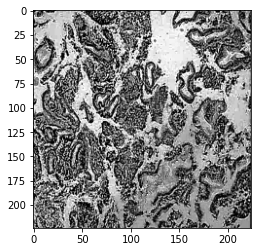

In [ ]:
cnn_models_train = model_result(cnn_models)

SVC

svm.SVC(decision_function_shape='ovo',kernel='linear')

In [ ]:
print(cnn_models_train)

                                 Convolution Model  Accuracy  True Negatives  \
0            <function ResNet50 at 0x7f23fd1fd4c0>  0.685065           102.0   
1           <function ResNet101 at 0x7f23fd1fd550>  0.677489            97.0   
2           <function ResNet152 at 0x7f23fd1fd5e0>  0.682900           110.0   
3          <function ResNet50V2 at 0x7f23fd20a4c0>  0.521645            55.0   
4         <function ResNet101V2 at 0x7f23fd20a5e0>  0.519481            62.0   
5         <function ResNet152V2 at 0x7f23fd20a670>  0.498918            59.0   
6            <function Xception at 0x7f23fd20adc0>  0.524892            62.0   
7               <function VGG16 at 0x7f23fd20a820>  0.685065            99.0   
8               <function VGG19 at 0x7f23fd20aaf0>  0.679654           107.0   
9         <function InceptionV3 at 0x7f23fd25af70>  0.497835            52.0   
10  <function InceptionResNetV2 at 0x7f23fd25ac10>  0.433983            48.0   
11        <function DenseNet201 at 0x7f2

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



def model_result(funcs, aug = False):

  res_df = pd.DataFrame()
  res_df["Convolution Model"] = pd.Series([])
  res_df["Accuracy"] = pd.Series([])
  res_df["True Negatives"] = pd.Series([])
  res_df["False Negatives"] = pd.Series([])
  res_df["True Positives"] = pd.Series([])
  res_df["False Positives"] = pd.Series([])

  for i in funcs:
    base_model = i
    #Load model without classifier/fully connected layers
    inp_model = base_model(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet',
    )
    #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
    for layer in inp_model.layers:
      layer.trainable = False
    
    if aug == True:
      inputs = Input(shape=(224, 224, 3))
      x = data_augmentation(inputs)
      # x = preprocess_input(inputs)
      outputs = inp_model(x)
      inp_model = tf.keras.Model(inputs, outputs)
    # inp_model.summary()  #Trainable parameters will be 0

    #Now, let us use features from convolutional network for RF
    feature_extractor = inp_model.predict(x_train)

    features = feature_extractor.reshape(feature_extractor.shape[0], -1)

    X_for_RF = features #This is our X input to RF

    

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    # rf = RandomForestRegressor()
    #RANDOM FOREST
    from sklearn import svm
    rf=svm.SVC(decision_function_shape='ovr',kernel='rbf')

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    # RF_model_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

    # Fit the random search model
    # RF_model_search.fit(X_for_RF, y_train)
    # RF_model = RF_model_search.best_estimator_

    RF_model = rf
    # # Train the model on training data
    RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

    #Send test data through same feature extractor process
    X_test_feature = inp_model.predict(x_test)
    X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

    #Now predict using the trained RF model. 
    prediction_RF = RF_model.predict(X_test_features)

    #Print overall accuracy
    from sklearn import metrics
    acc = metrics.accuracy_score(y_test, prediction_RF)
    print ("Accuracy = ", acc)

    #Confusion Matrix - verify accuracy of each class
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test, prediction_RF)
    #print(cm)
    # sns.heatmap(cm, annot=True)
    res_df.loc[len(res_df)] = [str(i), acc, cm[0][0], cm[1][0], cm[1][1], cm[0][1]]
    print(res_df.loc[len(res_df) - 1])
    #Check results on a few select images
    n=np.random.randint(0, x_test.shape[0])
    img = x_test[n]
    plt.imshow(img)
    input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
    input_img_feature= inp_model.predict(input_img)
    input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
    prediction_RF = RF_model.predict(input_img_features)[0]
    print("The prediction for this image is: ", prediction_RF)
    print("The actual label for this image is: ", y_test[n])
  
  return res_df

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


<ipython-input-22-8cd2b32af511>:36: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["Convolution Model"] = pd.Series([])
<ipython-input-22-8cd2b32af511>:37: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["Accuracy"] = pd.Series([])
<ipython-input-22-8cd2b32af511>:38: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["True Negatives"] = pd.Series([])
<ipython-input-22-8cd2b32af511>:39: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["False Negatives"] = pd.Series([])
<ipython-input-22-8cd2

29/29 [==============================] - 3s 89ms/step
Accuracy =  0.6883116883116883
Convolution Model    <function ResNet50 at 0x7f23fd1fd4c0>
Accuracy                                          0.688312
True Negatives                                       101.0
False Negatives                                       14.0
True Positives                                        98.0
False Positives                                        5.0
Name: 0, dtype: object
1/1 [==============================] - 0s 41ms/step
The prediction for this image is:  2
The actual label for this image is:  2
29/29 [==============================] - 4s 153ms/step
Accuracy =  0.6764069264069265
Convolution Model    <function ResNet101 at 0x7f23fd1fd550>
Accuracy                                           0.676407
True Negatives                                         96.0
False Negatives                                        22.0
True Positives                                         92.0
False Positives         

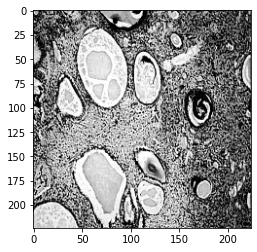

In [ ]:
cnn_models_train = model_result(cnn_models)

SVC

svm.SVC(decision_function_shape='ovr',kernel='rbf')

In [ ]:
print(cnn_models_train)

                                 Convolution Model  Accuracy  True Negatives  \
0            <function ResNet50 at 0x7f23fd1fd4c0>  0.688312           101.0   
1           <function ResNet101 at 0x7f23fd1fd550>  0.676407            96.0   
2           <function ResNet152 at 0x7f23fd1fd5e0>  0.690476           106.0   
3          <function ResNet50V2 at 0x7f23fd20a4c0>  0.450216            67.0   
4         <function ResNet101V2 at 0x7f23fd20a5e0>  0.415584            71.0   
5         <function ResNet152V2 at 0x7f23fd20a670>  0.383117            85.0   
6            <function Xception at 0x7f23fd20adc0>  0.500000            47.0   
7               <function VGG16 at 0x7f23fd20a820>  0.667749           106.0   
8               <function VGG19 at 0x7f23fd20aaf0>  0.674242           110.0   
9         <function InceptionV3 at 0x7f23fd25af70>  0.488095            52.0   
10  <function InceptionResNetV2 at 0x7f23fd25ac10>  0.277056            79.0   
11        <function DenseNet201 at 0x7f2

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



def model_result(funcs, aug = False):

  res_df = pd.DataFrame()
  res_df["Convolution Model"] = pd.Series([])
  res_df["Accuracy"] = pd.Series([])
  res_df["True Negatives"] = pd.Series([])
  res_df["False Negatives"] = pd.Series([])
  res_df["True Positives"] = pd.Series([])
  res_df["False Positives"] = pd.Series([])

  for i in funcs:
    base_model = i
    #Load model without classifier/fully connected layers
    inp_model = base_model(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet',
    )
    #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
    for layer in inp_model.layers:
      layer.trainable = False
    
    if aug == True:
      inputs = Input(shape=(224, 224, 3))
      x = data_augmentation(inputs)
      # x = preprocess_input(inputs)
      outputs = inp_model(x)
      inp_model = tf.keras.Model(inputs, outputs)
    # inp_model.summary()  #Trainable parameters will be 0

    #Now, let us use features from convolutional network for RF
    feature_extractor = inp_model.predict(x_train)

    features = feature_extractor.reshape(feature_extractor.shape[0], -1)

    X_for_RF = features #This is our X input to RF

    

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    # rf = RandomForestRegressor()
    #RANDOM FOREST
    from sklearn.neural_network import MLPClassifier
    rf=MLPClassifier(random_state=1, max_iter=300)

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    # RF_model_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

    # Fit the random search model
    # RF_model_search.fit(X_for_RF, y_train)
    # RF_model = RF_model_search.best_estimator_

    RF_model = rf
    # # Train the model on training data
    RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

    #Send test data through same feature extractor process
    X_test_feature = inp_model.predict(x_test)
    X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

    #Now predict using the trained RF model. 
    prediction_RF = RF_model.predict(X_test_features)

    #Print overall accuracy
    from sklearn import metrics
    acc = metrics.accuracy_score(y_test, prediction_RF)
    print ("Accuracy = ", acc)

    #Confusion Matrix - verify accuracy of each class
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test, prediction_RF)
    #print(cm)
    # sns.heatmap(cm, annot=True)
    res_df.loc[len(res_df)] = [str(i), acc, cm[0][0], cm[1][0], cm[1][1], cm[0][1]]
    print(res_df.loc[len(res_df) - 1])
    #Check results on a few select images
    n=np.random.randint(0, x_test.shape[0])
    img = x_test[n]
    plt.imshow(img)
    input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
    input_img_feature= inp_model.predict(input_img)
    input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
    prediction_RF = RF_model.predict(input_img_features)[0]
    print("The prediction for this image is: ", prediction_RF)
    print("The actual label for this image is: ", y_test[n])
  
  return res_df

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


MLP

MLPClassifier(random_state=1, max_iter=300)

0.675325


<ipython-input-27-f15d48674bf2>:36: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["Convolution Model"] = pd.Series([])
<ipython-input-27-f15d48674bf2>:37: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["Accuracy"] = pd.Series([])
<ipython-input-27-f15d48674bf2>:38: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["True Negatives"] = pd.Series([])
<ipython-input-27-f15d48674bf2>:39: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["False Negatives"] = pd.Series([])
<ipython-input-27-f15d

29/29 [==============================] - 3s 89ms/step
Accuracy =  0.6525974025974026
Convolution Model    <function ResNet50 at 0x7f23fd1fd4c0>
Accuracy                                          0.652597
True Negatives                                        86.0
False Negatives                                        9.0
True Positives                                       102.0
False Positives                                       12.0
Name: 0, dtype: object
1/1 [==============================] - 0s 40ms/step
The prediction for this image is:  3
The actual label for this image is:  4
29/29 [==============================] - 4s 154ms/step
Accuracy =  0.6753246753246753
Convolution Model    <function ResNet101 at 0x7f23fd1fd550>
Accuracy                                           0.675325
True Negatives                                         90.0
False Negatives                                        14.0
True Positives                                         92.0
False Positives         

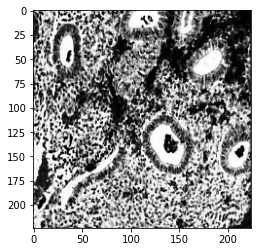

In [ ]:
cnn_models_train = model_result(cnn_models)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



def model_result(funcs, aug = False):

  res_df = pd.DataFrame()
  res_df["Convolution Model"] = pd.Series([])
  res_df["Accuracy"] = pd.Series([])
  res_df["True Negatives"] = pd.Series([])
  res_df["False Negatives"] = pd.Series([])
  res_df["True Positives"] = pd.Series([])
  res_df["False Positives"] = pd.Series([])

  for i in funcs:
    base_model = i
    #Load model without classifier/fully connected layers
    inp_model = base_model(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet',
    )
    #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
    for layer in inp_model.layers:
      layer.trainable = False
    
    if aug == True:
      inputs = Input(shape=(224, 224, 3))
      x = data_augmentation(inputs)
      # x = preprocess_input(inputs)
      outputs = inp_model(x)
      inp_model = tf.keras.Model(inputs, outputs)
    # inp_model.summary()  #Trainable parameters will be 0

    #Now, let us use features from convolutional network for RF
    feature_extractor = inp_model.predict(x_train)

    features = feature_extractor.reshape(feature_extractor.shape[0], -1)

    X_for_RF = features #This is our X input to RF

    

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    # rf = RandomForestRegressor()
    #RANDOM FOREST
    from sklearn.neural_network import MLPClassifier
    # rf=MLPClassifier(activation='logistic',solver='sgd',random_state=1, max_iter=300)
    rf = MLPClassifier(max_iter=300,alpha=0.1,activation='relu',solver='adam',learning_rate_init = 0.001,random_state=0)
    

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    # RF_model_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

    # Fit the random search model
    # RF_model_search.fit(X_for_RF, y_train)
    # RF_model = RF_model_search.best_estimator_

    RF_model = rf
    # # Train the model on training data
    RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

    #Send test data through same feature extractor process
    X_test_feature = inp_model.predict(x_test)
    X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

    #Now predict using the trained RF model. 
    prediction_RF = RF_model.predict(X_test_features)

    #Print overall accuracy
    from sklearn import metrics
    acc = metrics.accuracy_score(y_test, prediction_RF)
    print ("Accuracy = ", acc)

    #Confusion Matrix - verify accuracy of each class
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test, prediction_RF)
    #print(cm)
    # sns.heatmap(cm, annot=True)
    res_df.loc[len(res_df)] = [str(i), acc, cm[0][0], cm[1][0], cm[1][1], cm[0][1]]
    print(res_df.loc[len(res_df) - 1])
    #Check results on a few select images
    n=np.random.randint(0, x_test.shape[0])
    img = x_test[n]
    plt.imshow(img)
    input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
    input_img_feature= inp_model.predict(input_img)
    input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
    prediction_RF = RF_model.predict(input_img_features)[0]
    print("The prediction for this image is: ", prediction_RF)
    print("The actual label for this image is: ", y_test[n])
  
  return res_df

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
cnn_models_train = model_result(cnn_models)

<ipython-input-29-4fe9a820cf25>:36: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["Convolution Model"] = pd.Series([])
<ipython-input-29-4fe9a820cf25>:37: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["Accuracy"] = pd.Series([])
<ipython-input-29-4fe9a820cf25>:38: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["True Negatives"] = pd.Series([])
<ipython-input-29-4fe9a820cf25>:39: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["False Negatives"] = pd.Series([])
<ipython-input-29-4fe9

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



def model_result(funcs, aug = False):

  res_df = pd.DataFrame()
  res_df["Convolution Model"] = pd.Series([])
  res_df["Accuracy"] = pd.Series([])
  res_df["True Negatives"] = pd.Series([])
  res_df["False Negatives"] = pd.Series([])
  res_df["True Positives"] = pd.Series([])
  res_df["False Positives"] = pd.Series([])

  for i in funcs:
    base_model = i
    #Load model without classifier/fully connected layers
    inp_model = base_model(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet',
    )
    #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
    for layer in inp_model.layers:
      layer.trainable = False
    
    if aug == True:
      inputs = Input(shape=(224, 224, 3))
      x = data_augmentation(inputs)
      # x = preprocess_input(inputs)
      outputs = inp_model(x)
      inp_model = tf.keras.Model(inputs, outputs)
    # inp_model.summary()  #Trainable parameters will be 0

    #Now, let us use features from convolutional network for RF
    feature_extractor = inp_model.predict(x_train)

    features = feature_extractor.reshape(feature_extractor.shape[0], -1)

    X_for_RF = features #This is our X input to RF

    

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    # rf = RandomForestRegressor()
    #RANDOM FOREST
    from sklearn.neural_network import MLPClassifier
    rf=MLPClassifier(activation='tanh',solver='lbfgs',random_state=1, max_iter=300)

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    # RF_model_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

    # Fit the random search model
    # RF_model_search.fit(X_for_RF, y_train)
    # RF_model = RF_model_search.best_estimator_

    RF_model = rf
    # # Train the model on training data
    RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

    #Send test data through same feature extractor process
    X_test_feature = inp_model.predict(x_test)
    X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

    #Now predict using the trained RF model. 
    prediction_RF = RF_model.predict(X_test_features)

    #Print overall accuracy
    from sklearn import metrics
    acc = metrics.accuracy_score(y_test, prediction_RF)
    print ("Accuracy = ", acc)

    #Confusion Matrix - verify accuracy of each class
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test, prediction_RF)
    #print(cm)
    # sns.heatmap(cm, annot=True)
    res_df.loc[len(res_df)] = [str(i), acc, cm[0][0], cm[1][0], cm[1][1], cm[0][1]]
    print(res_df.loc[len(res_df) - 1])
    #Check results on a few select images
    n=np.random.randint(0, x_test.shape[0])
    img = x_test[n]
    plt.imshow(img)
    input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
    input_img_feature= inp_model.predict(input_img)
    input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
    prediction_RF = RF_model.predict(input_img_features)[0]
    print("The prediction for this image is: ", prediction_RF)
    print("The actual label for this image is: ", y_test[n])
  
  return res_df

In [ ]:
cnn_models_train = model_result(cnn_models)